In [ ]:
import tensorflow as tf

In [ ]:
X = tf.range(-100,100,4,dtype=tf.float32)
y = X+10
X = tf.reshape(X,shape=[len(X),1])
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [ ]:
# regression model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=X_train.shape,activation=None),
    tf.keras.layers.Dense(1)
],name="regression model")

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "regression model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 40, 100)           200       
                                                                 
 dense_67 (Dense)            (None, 40, 1)             101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


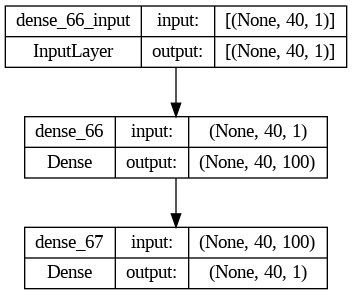

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#insurance dataset

In [ ]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance = pd.get_dummies(insurance)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# separating data into features and labels
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

In [ ]:
# splitting data into test and train randomly
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
# building and training neural network regression model

callback = tf.keras.callbacks.EarlyStopping(monitor="mae",start_from_epoch=0)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

history = insurance_model.fit(X_train, y_train, epochs = 200)

In [ ]:
y_pred = insurance_model.predict(X_test).squeeze()

9/9 [==============================] - 0s 2ms/step


In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
y_test_numpy = np.array(y_test)
plt.figure()
plt.scatter(y_test_numpy[:100], y_pred[:100], label = "True vs Predictions")
plt.legend()
plt.show()

In [ ]:
def mae(y_test, y_pred):
  return tf.keras.losses.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.keras.losses.mean_squared_error(y_test, y_pred)

In [ ]:
mae_loss = mae(y_test_numpy,y_pred)
mse_loss = mse(y_test_numpy,y_pred)

In [ ]:
tf.abs(y_pred.mean()-y_test.mean())

<tf.Tensor: shape=(), dtype=float64, numpy=1447.5885472444043>

In [ ]:
insurance_model.save("insurance_model.h5")

<Axes: ylabel='Frequency'>

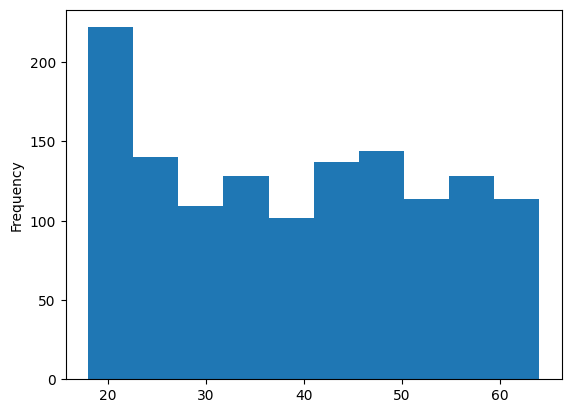

In [ ]:
X['age'].plot(kind="hist")

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region'])
)

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape

(1070, 11)

In [ ]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

history = insurance_model.fit(X_train_normal, y_train, epochs = 200)

In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1743.2548 - mae: 1743.2548


[1743.2547607421875, 1743.2547607421875]

In [ ]:
insurance_model.save("insurance_model.h5")